In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from matplotlib.colors import LogNorm

In [4]:
df=pd.read_excel('SSSFDM.xlsx')

In [5]:
df.shape

(4882, 180)

In [6]:
df=df[df.MF<=200].reset_index(drop=True)

In [7]:
dfo=df[df.files==0]
df1=df[df.files==1]
df2=df[df.files==2]
ind=pd.DataFrame({'MF':[100,120,140,160,180,200],'MF/MS':[1.2,1.19,1.18,1.17,1.16,1.15]})
ind['ss']=ind['MF']/ind['MF/MS']

In [8]:
dfos=dfo[np.logical_and(dfo.Ys1==0.001,dfo.MF-dfo.ss<10) ].sort_values('MF').reset_index(drop=True)
MFcte=100
dfos=dfos.append({'MF':MFcte,'ss':MFcte-(dfos.MF-dfos.ss).values[0]},ignore_index=True).sort_values('MF').reset_index(drop=True)
MFcte=200
dfos=dfos.append({'MF':MFcte,'ss':MFcte-(dfos.MF-dfos.ss).values[-1]},ignore_index=True)
dfos=dfos.sort_values('MF').reset_index(drop=True)

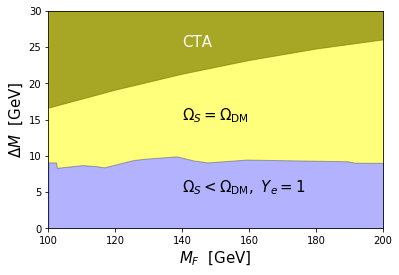

In [14]:
ymax=30
#dfos=dfo[np.logical_and(dfo.Ys1==0.001,dfo.MF-dfo.ss<10) ]
#plt.hexbin(dfo.MF,dfo.MF-dfo.ss,dfo.Ys1,norm=LogNorm())#df.Omega_h2,norm=LogNorm())#,yscale='log'
#plt.plot(dfo.MF,dfo.MF-dfo.ss,'y.')
##plt.plot(df1.MF,df1.MF-df1.ss,'c.')
#plt.plot(df2.MF,df2.MF-df2.ss,'b.')
#plt.plot(dfos.MF,dfos.MF-dfos.ss)
#plt.plot(ind.MF,ind.MF-ind.ss)
plt.fill_between(ind.MF,ind.MF-ind.ss,ymax,alpha=0.7,interpolate=True,color='black')
plt.fill_between(dfos.MF,dfos.MF-dfos.ss,ymax,alpha=0.3,interpolate=True,color='yellow')
plt.fill_between(dfos.MF,dfos.MF-dfos.ss,ymax,alpha=0.3,interpolate=True,color='yellow')
plt.fill_between(dfos.MF,dfos.MF-dfos.ss,0,alpha=0.3,interpolate=True,color='blue')
plt.ylim(0,ymax)
plt.xlim(100,200)
plt.text(140,25,'CTA',size=15,color='white')
plt.text(140,15,r'$\Omega_S=\Omega_{\rm DM}$',size=15)
plt.text(140,5,r'$\Omega_S<\Omega_{\rm DM},\ Y_e=1$',size=15)
plt.xlabel(r'$M_F$  [GeV]',size=15 )
plt.ylabel(r'$\Delta M$  [GeV]',size=15 )
plt.savefig('ps.pdf')
#plt.colorbar()

In [57]:
ind['DeltaM']=ind.MF-ind.ss
ind

,MF,MF/MS,ss,DeltaM
0,100,1.20,83.333333,16.666667
1,120,1.19,100.840336,19.159664
2,140,1.18,118.644068,21.355932
3,160,1.17,136.752137,23.247863
4,180,1.16,155.172414,24.827586
5,200,1.15,173.913043,26.086957


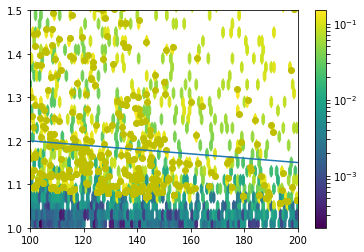

In [51]:
plt.hexbin(df.MF,df.MF/df.ss,df.Omega_h2,norm=LogNorm())
plt.plot(dfo.MF,dfo.MF/dfo.ss,'yo')
plt.plot(ind.MF,ind.MF/ind.ss)
plt.ylim(1,1.5)
plt.colorbar()

In [27]:
dfo.Omega_h2.max()

0.14899999999999999

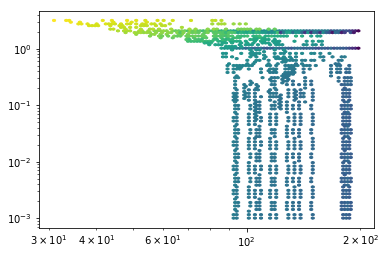

In [18]:
plt.hexbin(df.ss,df.Ys1,df.MF/df.ss-1,xscale='log',yscale='log',norm=LogNorm())